# test to find the best number of classes for LCA using BIC and AIC

In [12]:
# Installa pacchetti necessari
install.packages("poLCA")
install.packages("ggplot2")


The downloaded binary packages are in
	/var/folders/mx/tjch5_wj6jb11_qwfd_w7ysr0000gn/T//RtmpvmRmjZ/downloaded_packages

The downloaded binary packages are in
	/var/folders/mx/tjch5_wj6jb11_qwfd_w7ysr0000gn/T//RtmpvmRmjZ/downloaded_packages


In [13]:

# Carica pacchetti
library(poLCA)
library(ggplot2)

In [14]:

# Importa i dati (modifica il percorso se necessario)
data <- read.csv("/Users/lorispalmarin/PycharmProjects/EpidemLab/lca_data.csv")

# Assicurati che tutte le variabili siano categoriche
data[] <- lapply(data, factor)

In [15]:

# Costruisci la formula per LCA
lca_formula <- as.formula(paste("cbind(", paste(names(data), collapse = ", "), ") ~ 1"))

In [16]:

# Loop per testare diversi numeri di classi
bic_values <- c()
aic_values <- c()
nclass_range <- 2:6  # Modifica il range se vuoi testare più o meno classi

set.seed(123)  # Per riproducibilità
for (k in nclass_range) {
  model <- poLCA(lca_formula, data, nclass = k, maxiter = 1000, verbose = FALSE)
  bic_values <- c(bic_values, model$bic)
  aic_values <- c(aic_values, model$aic)
}


 ALERT: at least one manifest variable contained only one
    outcome category, and has been removed from the analysis. 


 ALERT: at least one manifest variable contained only one
    outcome category, and has been removed from the analysis. 


 ALERT: at least one manifest variable contained only one
    outcome category, and has been removed from the analysis. 


 ALERT: at least one manifest variable contained only one
    outcome category, and has been removed from the analysis. 


 ALERT: at least one manifest variable contained only one
    outcome category, and has been removed from the analysis. 



In [17]:

# Crea un dataframe per la visualizzazione
fit_stats <- data.frame(
  Classes = nclass_range,
  BIC = bic_values,
  AIC = aic_values
)

  Classes      BIC      AIC
1       2 203890.5 203425.6
2       3 203300.4 202599.7
3       4 202466.6 201530.2
4       5 202197.3 201025.2
5       6 201935.7 200527.8


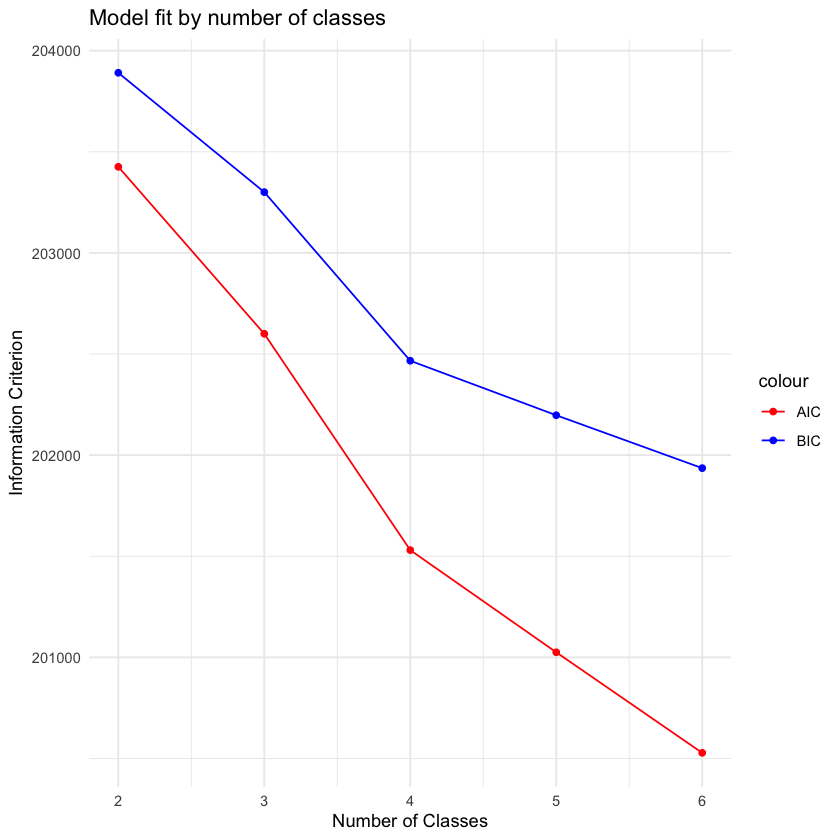

In [18]:

# Plot BIC e AIC
plot <- ggplot(fit_stats, aes(x = Classes)) +
  geom_line(aes(y = BIC, color = "BIC")) +
  geom_line(aes(y = AIC, color = "AIC")) +
  geom_point(aes(y = BIC, color = "BIC")) +
  geom_point(aes(y = AIC, color = "AIC")) +
  labs(title = "Model fit by number of classes",
       y = "Information Criterion",
       x = "Number of Classes") +
  scale_color_manual(values = c("BIC" = "blue", "AIC" = "red")) +
  theme_minimal()
print(plot)
print(fit_stats)

# optimal is 5, so we do it with 5 classes

In [19]:
# Costruisci la formula per la LCA
lca_formula <- as.formula(paste("cbind(", paste(names(data), collapse = ", "), ") ~ 1"))

In [20]:

# Esegui la LCA con 5 classi
set.seed(123)
lca_model_5 <- poLCA(lca_formula, data, nclass = 5, maxiter = 1000)


 ALERT: at least one manifest variable contained only one
    outcome category, and has been removed from the analysis. 

Conditional item response (column) probabilities,
 by outcome variable, for each class (row) 
 
$PASTI1
               1      2
class 1:  0.0650 0.9350
class 2:  0.0279 0.9721
class 3:  0.0248 0.9752
class 4:  0.0712 0.9288
class 5:  0.0218 0.9782

$ALI26
               1      2
class 1:  0.3976 0.6024
class 2:  0.2525 0.7475
class 3:  0.5972 0.4028
class 4:  0.4568 0.5432
class 5:  0.2401 0.7599

$ALI28
               1      2
class 1:  0.3792 0.6208
class 2:  0.3840 0.6160
class 3:  0.3029 0.6971
class 4:  0.4765 0.5235
class 5:  0.3846 0.6154

$ALI29
               1      2
class 1:  0.2647 0.7353
class 2:  0.1193 0.8807
class 3:  0.6046 0.3954
class 4:  0.3323 0.6677
class 5:  0.0739 0.9261

$ALI30
               1      2
class 1:  0.4937 0.5063
class 2:  0.4317 0.5683
class 3:  0.4421 0.5579
class 4:  0.4870 0.5130
class 5:  0.3916 0.6084

$ALI32
             

In [21]:

# Assegna la classe latente più probabile a ogni individuo
data$class_lca <- lca_model_5$predclass

In [22]:

# Esporta il dataset con le classi in un nuovo CSV
write.csv(data, "/Users/lorispalmarin/PycharmProjects/EpidemLab/data/lca_data_with_classes.csv", row.names = FALSE)